In [1]:
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Carregar o dataset
print("Carregando o dataset 'Covertype'...\n")
data = fetch_covtype(as_frame=True)
description_data = fetch_covtype()

# Exibir descri√ß√£o da base
print("Descri√ß√£o do Dataset:\n")
print(description_data.DESCR)  #

# Separar vari√°veis e classes
X = data.data
y = data.target

# Mostrar as classes presentes no target
print("\nClasses (Tipos de Cobertura Florestal):\n")
print("Valores √∫nicos encontrados na vari√°vel de sa√≠da (y):", sorted(y.unique()))
print(f"Total de classes distintas: {len(y.unique())}")

# Listar as features dispon√≠veis
print("\nLista de Features Dispon√≠veis no Dataset:\n")
for i, feature in enumerate(X.columns, 1):
    print(f"{i:2}. {feature}")

Carregando o dataset 'Covertype'...

Descri√ß√£o do Dataset:

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30√ó30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

=================   ============
Classes                        7
Samples total             581012
Dimensionality                54
Features                     int
=================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the tar

In [2]:
features_continuas = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

print("Vari√°veis Cont√≠nuas Selecionadas (10):")
for i, feat in enumerate(features_continuas, 1):
    print(f"{i}. {feat}")

features_binarias = [col for col in X.columns if col not in features_continuas]

print(f"\nVari√°veis Bin√°rias Detectadas ({len(features_binarias)}):")
for i, feat in enumerate(features_binarias, 1):
    print(f"{i}. {feat}")

# Resumo estat√≠stico antes e depois da normaliza√ß√£o
X_cont = X[features_continuas]
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_cont)
X_norm_df = pd.DataFrame(X_norm, columns=features_continuas)

print("\nResumo Estat√≠stico das Vari√°veis Cont√≠nuas ‚Äî Original vs. Normalizado:")
print("""
Objetivo: comparar estat√≠sticas descritivas (m√©dia, desvio padr√£o, m√≠nimo, m√°ximo) antes e depois da normaliza√ß√£o.

‚Üí O m√©todo .describe() mostra essas estat√≠sticas por vari√°vel.
‚Üí Isso √© √∫til para verificar o efeito da transforma√ß√£o e confirmar que a normaliza√ß√£o foi aplicada corretamente.
""")

summary_before = X_cont.describe().T[['mean', 'std', 'min', 'max']]
summary_after = X_norm_df.describe().T[['mean', 'std', 'min', 'max']]
summary_combined = pd.concat([
    summary_before.rename(columns=lambda x: f'{x}_original'),
    summary_after.rename(columns=lambda x: f'{x}_normalizado')
], axis=1)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(summary_combined.round(2))

print("""
Justificativa para Separar e Normalizar:
- As vari√°veis cont√≠nuas possuem escalas diferentes (ex: 'Elevation' varia de centenas a milhares; 'Aspect' vai at√© 360).
- O Naive Bayes Gaussiano assume que as vari√°veis seguem uma distribui√ß√£o normal com m√©dia 0 e desvio padr√£o 1 para cada classe.
- A normaliza√ß√£o (z-score) ajuda a aproximar essa suposi√ß√£o, melhorando o desempenho e a robustez do modelo.
- J√° as vari√°veis bin√°rias (0 ou 1) n√£o precisam ser transformadas ‚Äî elas j√° est√£o em escala adequada e sua distribui√ß√£o √© discreta.
- Normalizar evita que vari√°veis com escala maior dominem a probabilidade total calculada pelo Naive Bayes.
""")

Vari√°veis Cont√≠nuas Selecionadas (10):
1. Elevation
2. Aspect
3. Slope
4. Horizontal_Distance_To_Hydrology
5. Vertical_Distance_To_Hydrology
6. Horizontal_Distance_To_Roadways
7. Hillshade_9am
8. Hillshade_Noon
9. Hillshade_3pm
10. Horizontal_Distance_To_Fire_Points

Vari√°veis Bin√°rias Detectadas (44):
1. Wilderness_Area_0
2. Wilderness_Area_1
3. Wilderness_Area_2
4. Wilderness_Area_3
5. Soil_Type_0
6. Soil_Type_1
7. Soil_Type_2
8. Soil_Type_3
9. Soil_Type_4
10. Soil_Type_5
11. Soil_Type_6
12. Soil_Type_7
13. Soil_Type_8
14. Soil_Type_9
15. Soil_Type_10
16. Soil_Type_11
17. Soil_Type_12
18. Soil_Type_13
19. Soil_Type_14
20. Soil_Type_15
21. Soil_Type_16
22. Soil_Type_17
23. Soil_Type_18
24. Soil_Type_19
25. Soil_Type_20
26. Soil_Type_21
27. Soil_Type_22
28. Soil_Type_23
29. Soil_Type_24
30. Soil_Type_25
31. Soil_Type_26
32. Soil_Type_27
33. Soil_Type_28
34. Soil_Type_29
35. Soil_Type_30
36. Soil_Type_31
37. Soil_Type_32
38. Soil_Type_33
39. Soil_Type_34
40. Soil_Type_35
41. Soil_Ty

Bloco de An√°lise Explorat√≥ria

=== Histogramas Antes e Depois da Normaliza√ß√£o ===

Objetivo: comparar a distribui√ß√£o de cada vari√°vel cont√≠nua antes e depois da normaliza√ß√£o.

‚Üí A normaliza√ß√£o √© fundamental para a melhora do desempenho do Naive Bayes (gaussiano), que assume distribui√ß√£o normal nas features.



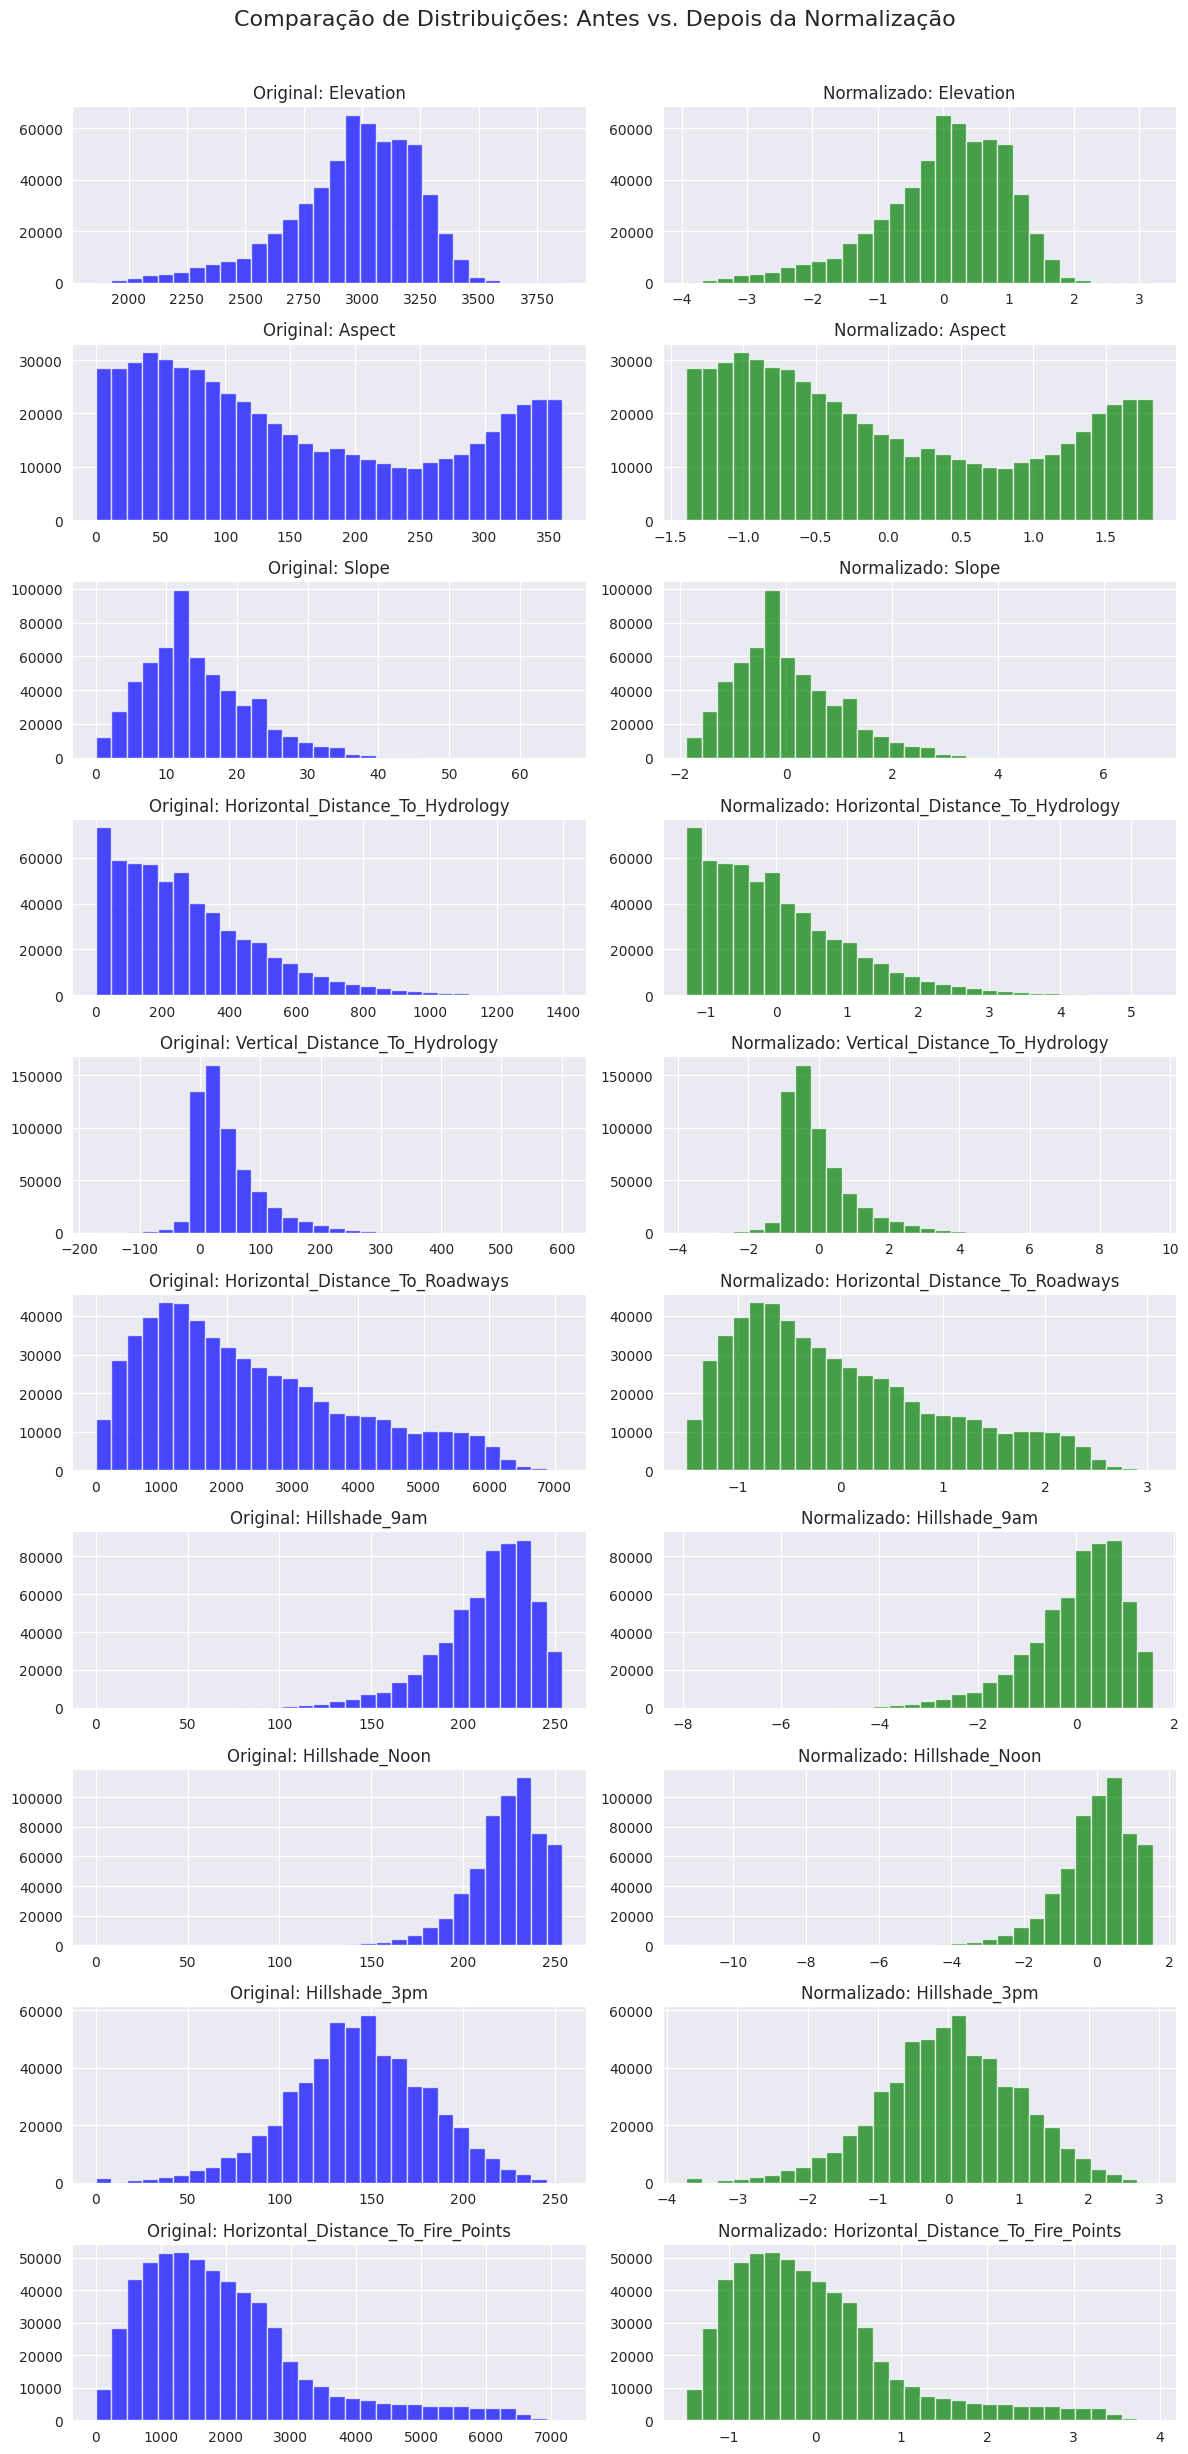

=== Histograma por Classe ===

Objetivo: visualizar como cada vari√°vel cont√≠nua se distribui entre as diferentes classes (tipos de cobertura florestal).

‚Üí Se as curvas estiverem bem separadas por classe, a vari√°vel pode ajudar o modelo.
‚Üí Se houver muita sobreposi√ß√£o entre as cores, essa vari√°vel tem baixo poder discriminativo.



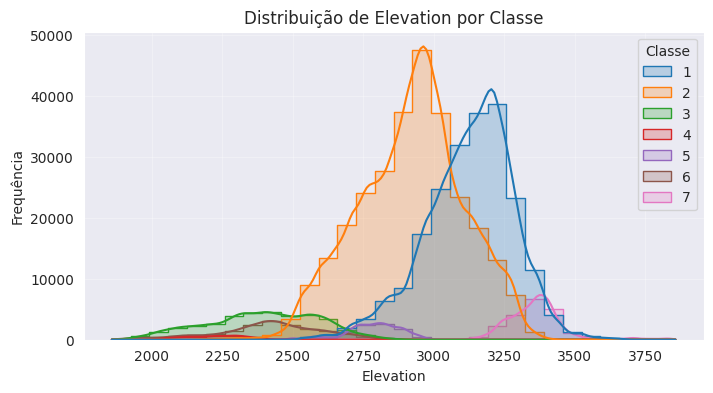

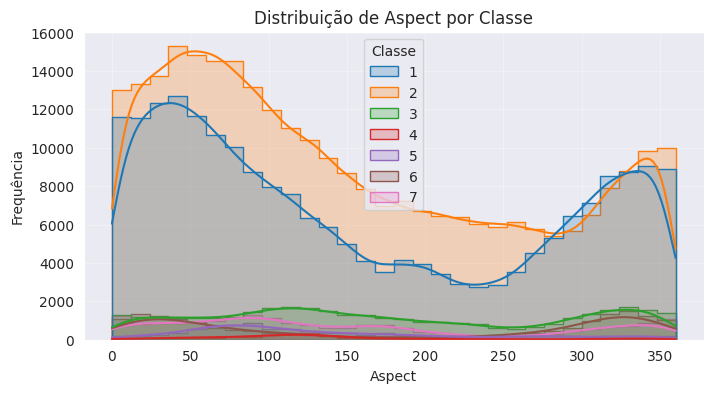

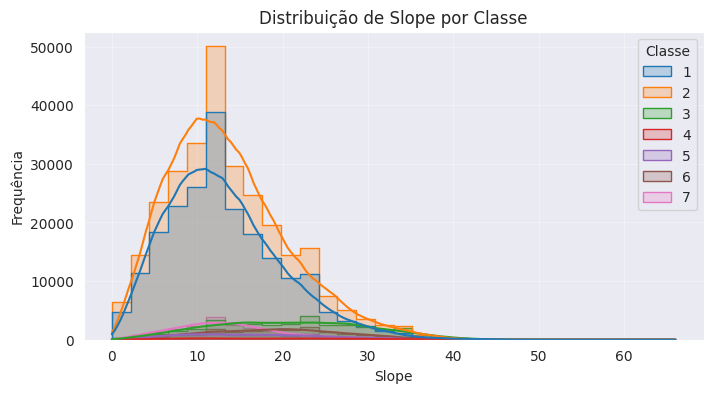

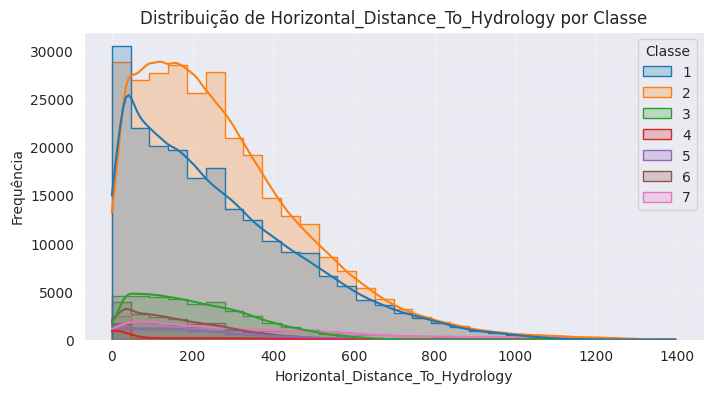

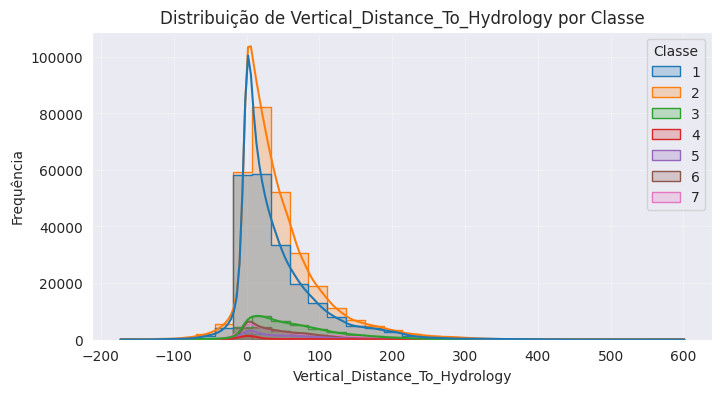

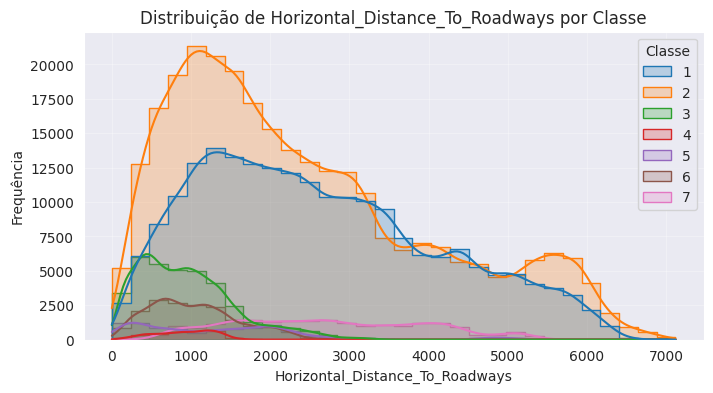

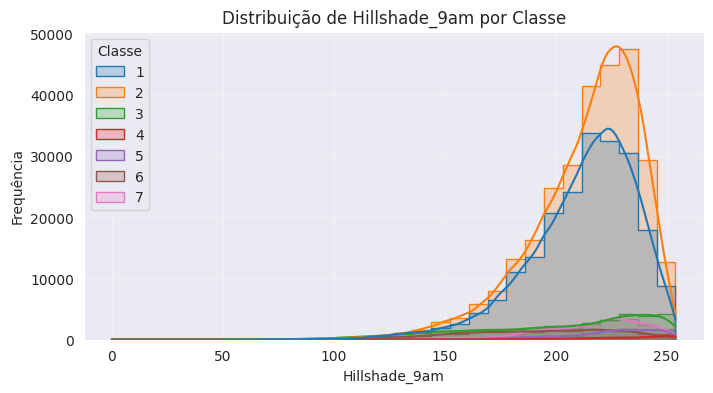

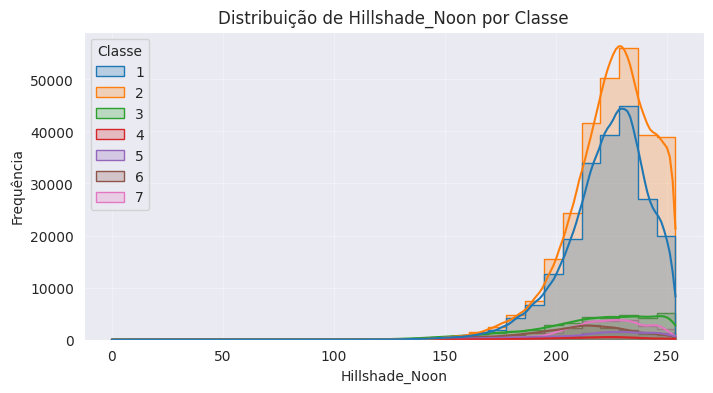

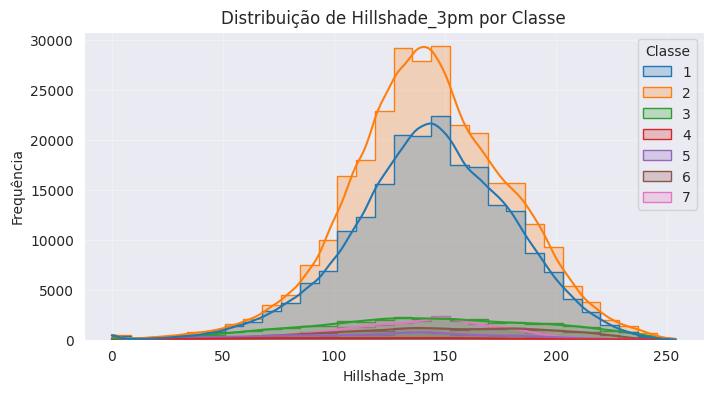

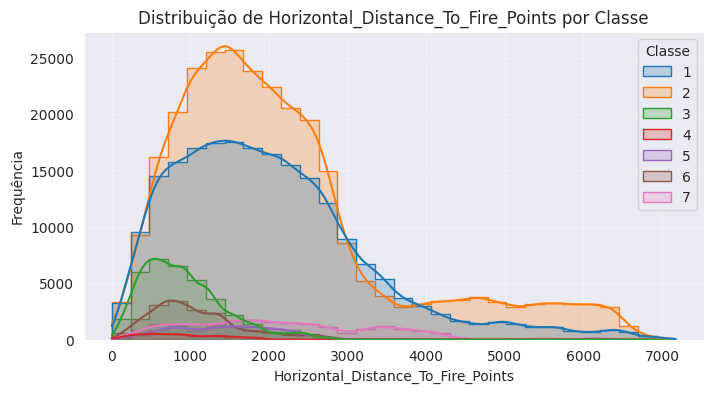


 Contour Plot ‚Äî Distribui√ß√µes e Fronteiras de Decis√£o do Naive Bayes

Objetivo: visualizar como o Naive Bayes toma decis√µes em 2D, considerando duas vari√°veis cont√≠nuas.

Vari√°veis escolhidas:
‚Üí Elevation ‚Äî Altitude do terreno (Elevation)
‚Üí Slope ‚Äî Inclina√ß√£o do terreno (Slope)

Por que isso √© √∫til?
- Permite enxergar as fronteiras de decis√£o aprendidas pelo Naive Bayes.
- Destaca onde h√° sobreposi√ß√£o entre classes.
- Ajuda a explicar visualmente poss√≠veis erros do modelo.



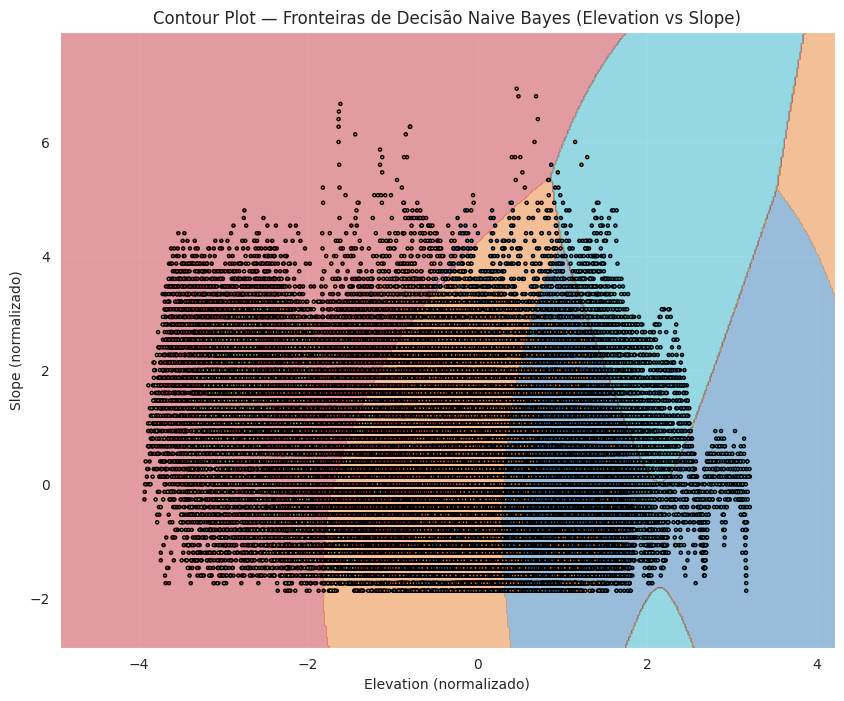


Interpreta√ß√£o:
- As regi√µes coloridas indicam como o Naive Bayes classifica novos pontos.
- As fronteiras podem parecer "suaves" devido √† suposi√ß√£o de distribui√ß√£o Gaussiana para cada classe.
- Sobreposi√ß√µes vis√≠veis (pontos de diferentes classes na mesma regi√£o) explicam os erros do modelo.



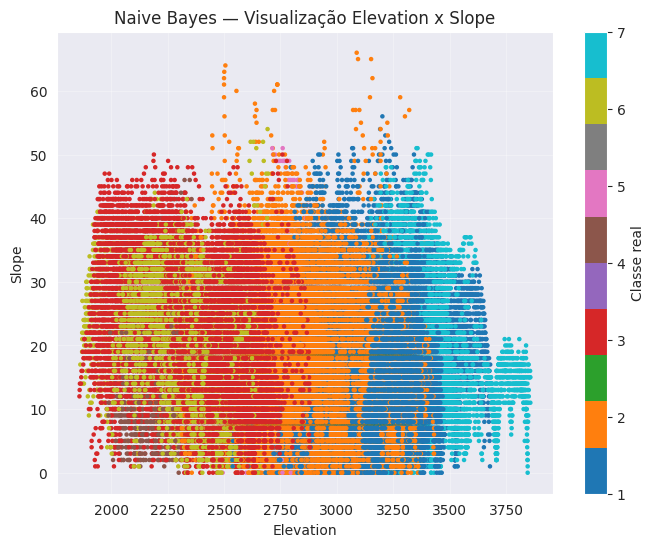

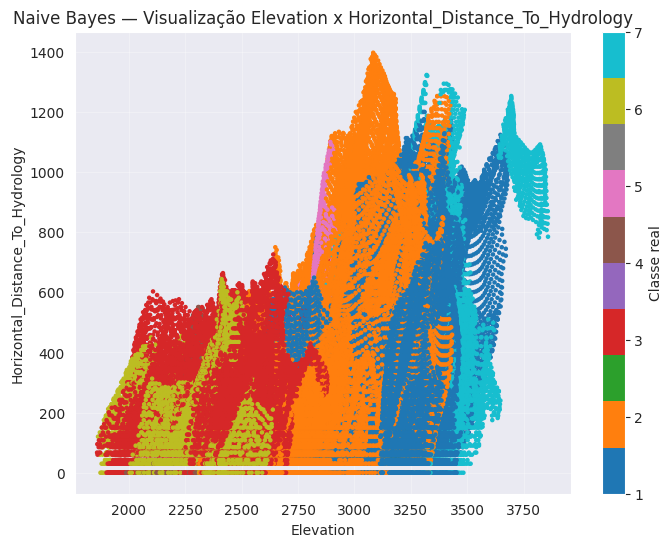

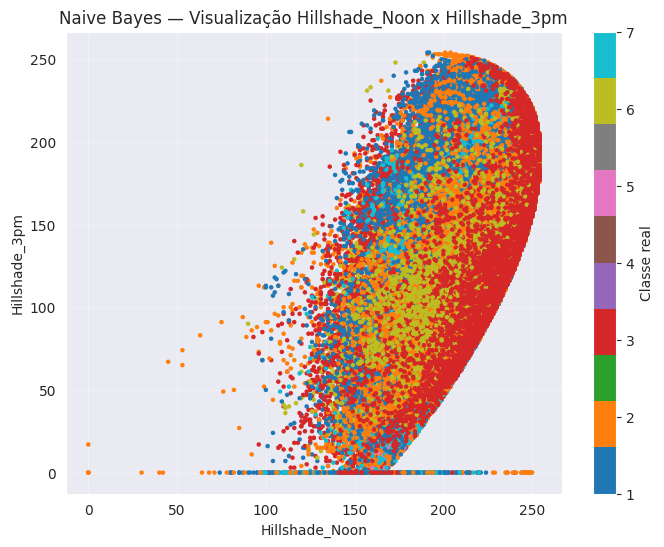

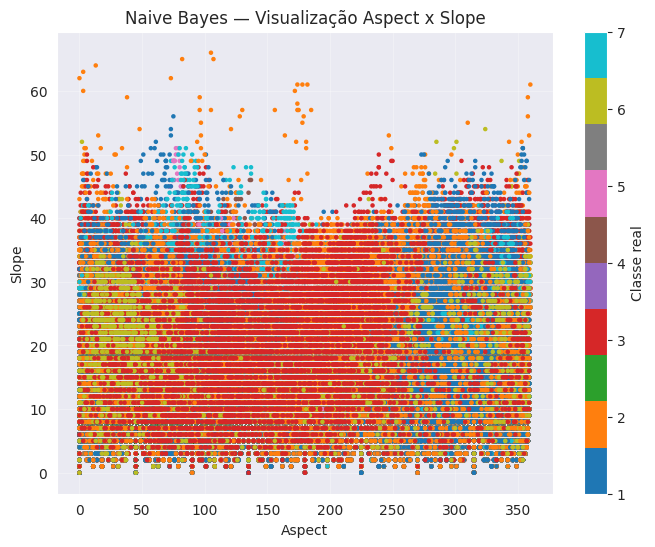


Essas visualiza√ß√µes ajudam a identificar regi√µes de sobreposi√ß√£o entre classes.
Isso √© √∫til para entender onde o Naive Bayes pode falhar, j√° que ele assume independ√™ncia entre vari√°veis.


PCA 2D ‚Äî Usando Todas as 54 Vari√°veis

Objetivo: visualizar a distribui√ß√£o geral das classes ap√≥s reduzir a base de 54 para 2 dimens√µes via PCA.



In [ ]:
print("Bloco de An√°lise Explorat√≥ria\n")

print("=== Histogramas Antes e Depois da Normaliza√ß√£o ===")
print("""
Objetivo: comparar a distribui√ß√£o de cada vari√°vel cont√≠nua antes e depois da normaliza√ß√£o.

‚Üí A normaliza√ß√£o √© fundamental para a melhora do desempenho do Naive Bayes (gaussiano), que assume distribui√ß√£o normal nas features.
""")

fig, axes = plt.subplots(len(features_continuas), 2, figsize=(12, len(features_continuas)*2.5))
fig.suptitle('Compara√ß√£o de Distribui√ß√µes: Antes vs. Depois da Normaliza√ß√£o', fontsize=16)

for i, feature in enumerate(features_continuas):
    axes[i, 0].hist(X_cont[feature], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {feature}')
    axes[i, 1].hist(X_norm_df[feature], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Normalizado: {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print("=== Histograma por Classe ===")
print("""
Objetivo: visualizar como cada vari√°vel cont√≠nua se distribui entre as diferentes classes (tipos de cobertura florestal).

‚Üí Se as curvas estiverem bem separadas por classe, a vari√°vel pode ajudar o modelo.
‚Üí Se houver muita sobreposi√ß√£o entre as cores, essa vari√°vel tem baixo poder discriminativo.
""")

for feature in features_continuas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=X.assign(Classe=y), x=feature, hue='Classe', kde=True, bins=30, palette='tab10', element='step')
    plt.title(f'Distribui√ß√£o de {feature} por Classe')
    plt.xlabel(feature)
    plt.ylabel('Frequ√™ncia')
    plt.grid(True, alpha=0.3)
    plt.show()

f1 = 'Elevation'
f2 = 'Slope'

print("\n Contour Plot ‚Äî Distribui√ß√µes e Fronteiras de Decis√£o do Naive Bayes")
print(f"""
Objetivo: visualizar como o Naive Bayes toma decis√µes em 2D, considerando duas vari√°veis cont√≠nuas.

Vari√°veis escolhidas:
‚Üí {f1} ‚Äî Altitude do terreno (Elevation)
‚Üí {f2} ‚Äî Inclina√ß√£o do terreno (Slope)

Por que isso √© √∫til?
- Permite enxergar as fronteiras de decis√£o aprendidas pelo Naive Bayes.
- Destaca onde h√° sobreposi√ß√£o entre classes.
- Ajuda a explicar visualmente poss√≠veis erros do modelo.
""")

# Selecionar duas features cont√≠nuas
f1 = 'Elevation'
f2 = 'Slope'

X_2d = X[[f1, f2]]

# Normalizar as duas vari√°veis (necess√°rio para o Naive Bayes Gaussiano)
scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

# Treinar modelo Naive Bayes somente nessas duas dimens√µes
model_2d = GaussianNB()
model_2d.fit(X_2d_scaled, y)

# Gerar grade para visualizar as regi√µes de decis√£o
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot com as regi√µes de decis√£o e os pontos reais
plt.figure(figsize=(10, 8))
cmap = ListedColormap(sns.color_palette("tab10").as_hex())
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)  # Regi√µes
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, cmap=cmap, edgecolor='k', s=5)  # Dados reais
plt.title(f'Contour Plot ‚Äî Fronteiras de Decis√£o Naive Bayes ({f1} vs {f2})')
plt.xlabel(f'{f1} (normalizado)')
plt.ylabel(f'{f2} (normalizado)')
plt.grid(True, alpha=0.3)
plt.show()

print("""
Interpreta√ß√£o:
- As regi√µes coloridas indicam como o Naive Bayes classifica novos pontos.
- As fronteiras podem parecer "suaves" devido √† suposi√ß√£o de distribui√ß√£o Gaussiana para cada classe.
- Sobreposi√ß√µes vis√≠veis (pontos de diferentes classes na mesma regi√£o) explicam os erros do modelo.
""")

# Scatter plots entre pares de features para an√°lise visual
feature_pairs = [
    ('Elevation', 'Slope'),
    ('Elevation', 'Horizontal_Distance_To_Hydrology'),
    ('Hillshade_Noon', 'Hillshade_3pm'),
    ('Aspect', 'Slope')
]

for f1, f2 in feature_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[f1], X[f2], c=y, cmap='tab10', s=5)
    plt.colorbar(label='Classe real')
    plt.title(f'Naive Bayes ‚Äî Visualiza√ß√£o {f1} x {f2}')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid(True, alpha=0.3)
    plt.show()

print("""
Essas visualiza√ß√µes ajudam a identificar regi√µes de sobreposi√ß√£o entre classes.
Isso √© √∫til para entender onde o Naive Bayes pode falhar, j√° que ele assume independ√™ncia entre vari√°veis.

""")

print("PCA 2D ‚Äî Usando Todas as 54 Vari√°veis\n")
print("Objetivo: visualizar a distribui√ß√£o geral das classes ap√≥s reduzir a base de 54 para 2 dimens√µes via PCA.\n")

scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c=y, cmap='tab10', s=5)
plt.colorbar(label='Classe Real')
plt.title('PCA 2D ‚Äî Todas as Features (54 dimens√µes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, alpha=0.5)
plt.show()

print("PCA 2D ‚Äî Somente com as 10 Vari√°veis Cont√≠nuas\n")
print("Objetivo: remover o ru√≠do das vari√°veis bin√°rias e destacar padr√µes mais claros entre as classes.\n")

X_continuas = X[features_continuas]

scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(X_continuas)

pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_cont_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca_cont[:, 0], X_pca_cont[:, 1], c=y, cmap='tab10', s=5)
plt.colorbar(label='Classe Real')
plt.title('PCA 2D ‚Äî Apenas Vari√°veis Cont√≠nuas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, alpha=0.5)
plt.show()

print("""
Exclu√≠mos as 44 vari√°veis bin√°rias (Wilderness e Soil_Type) porque t√™m baixa variabilidade (0 ou 1).
Isso pode distorcer a an√°lise visual no PCA.
""")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

print("\nEtapa: Preparando o Pr√©-Processador com ColumnTransformer")
print("""
Justificativa:
- O Naive Bayes Gaussiano (GaussianNB) assume que cada vari√°vel (feature) segue uma distribui√ß√£o normal (Gaussiana) dentro de cada classe.
- Isso vale para vari√°veis cont√≠nuas. Por isso, aplicamos padroniza√ß√£o (z-score) nelas para que tenham m√©dia ‚âà 0 e desvio padr√£o ‚âà 1.
- As vari√°veis bin√°rias (0 ou 1) j√° est√£o em escala adequada e **n√£o precisam ser normalizadas**.
""")

# Normalizar apenas as vari√°veis cont√≠nuas
preprocessador = ColumnTransformer([
    ('escala_continua', StandardScaler(), features_continuas)
], remainder='passthrough')

print("\nEtapa: Dividindo os Dados em Treino e Teste (80% / 20%)")
print("""
Justificativa:
- O split √© feito com estratifica√ß√£o para preservar a propor√ß√£o de cada classe nos dois conjuntos.
- Isso √© importante em conjuntos desbalanceados, como o Covertype.
""")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nEtapa: Construindo a Pipeline com Pr√©-processador + GaussianNB")
print("""
Justificativa:
- Usamos a `Pipeline` para garantir que a padroniza√ß√£o (z-score) seja aplicada corretamente e **somente aos dados de treino**.
- Isso evita *data leakage* e facilita a reutiliza√ß√£o do pipeline com valida√ß√£o cruzada ou produ√ß√£o.
- O classificador escolhido √© o **Naive Bayes Gaussiano (GaussianNB)**.

Por que usamos o GaussianNB?
- Porque nosso dataset cont√©m **vari√°veis cont√≠nuas** que se beneficiam da suposi√ß√£o de distribui√ß√£o Gaussiana.
- Embora tenhamos tamb√©m **vari√°veis bin√°rias (0 ou 1)**, o GaussianNB ainda pode lidar com elas, mesmo que **n√£o seja o ideal**.
- Talvez poderiamos ter trocado por **BernoulliNB**.

Observa√ß√£o sobre as vari√°veis bin√°rias:
- Idealmente, vari√°veis bin√°rias poderiam ser tratadas com **BernoulliNB**, que √© mais apropriado para dados discretos 0/1.
- No entanto, usamos `GaussianNB` por simplicidade e por permitir o uso conjunto com as vari√°veis cont√≠nuas, sem precisar separar ou treinar dois modelos distintos.
- Talvez poderiamos ter trocado por **BernoulliNB**.

""")

pipeline_nb = Pipeline([
    ('preprocessamento', preprocessador),
    ('classificador', GaussianNB())
])

print("\nEtapa: Treinando o Modelo na Base de Treino...")
pipeline_nb.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

In [ ]:
print("\nPCA 2D ‚Äî Visualiza√ß√£o de Acertos e Erros do Naive Bayes (Todas as Vari√°veis)")
print("""
Objetivo: analisar visualmente onde o modelo fez previs√µes corretas (azul) ou incorretas (vermelho), ap√≥s o treinamento.

Justificativa:
- Ajuda a identificar regi√µes onde o modelo erra.
- Visualiza a separa√ß√£o das classes no espa√ßo projetado via PCA.
- Permite detectar impacto de sobreposi√ß√£o de classes ou correla√ß√µes entre atributos.
""")

# Previs√µes com pipeline treinado
y_pred_full = pipeline_nb.predict(X)

# Acertos e erros
acertos = y_pred_full == y
erros = ~acertos

# PCA com todas as vari√°veis (base j√° normalizada: X_scaled)
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X_scaled)

# Plot do PCA com todas as features
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_full[:, 0], X_pca_full[:, 1], c='lightgray', s=3, label='Todas as Amostras')
plt.scatter(X_pca_full[acertos, 0], X_pca_full[acertos, 1], c='blue', s=5, label='Previs√µes Corretas')
plt.scatter(X_pca_full[erros, 0], X_pca_full[erros, 1], c='red', s=5, label='Previs√µes Incorretas')
plt.title('PCA 2D ‚Äî Acertos vs. Erros (Todas as Vari√°veis)', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nPCA 2D ‚Äî Apenas com Vari√°veis Cont√≠nuas")
print("""
Objetivo: repetir a visualiza√ß√£o, agora considerando apenas as 10 vari√°veis cont√≠nuas (sem as bin√°rias).

Justificativa:
- Remove o ru√≠do causado por vari√°veis bin√°rias (0 ou 1).
- Pode resultar em proje√ß√µes mais limpas e informativas.
""")

# Selecionar e normalizar apenas as vari√°veis cont√≠nuas
X_cont = X[features_continuas]
scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(X_cont)

# PCA somente com as vari√°veis cont√≠nuas
pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_cont_scaled)

# Plot do PCA com vari√°veis cont√≠nuas
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_cont[:, 0], X_pca_cont[:, 1], c='lightgray', s=3, label='Todas as Amostras')
plt.scatter(X_pca_cont[acertos, 0], X_pca_cont[acertos, 1], c='blue', s=5, label='Previs√µes Corretas')
plt.scatter(X_pca_cont[erros, 0], X_pca_cont[erros, 1], c='red', s=5, label='Previs√µes Incorretas')
plt.title('PCA 2D ‚Äî Acertos vs. Erros (Apenas Vari√°veis Cont√≠nuas)', fontsize=16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("""
Conclus√£o Comparativa:
- O gr√°fico com todas as vari√°veis pode ficar "polu√≠do" por ru√≠do das 44 vari√°veis bin√°rias.
- O gr√°fico com apenas as cont√≠nuas tende a revelar padr√µes mais suaves e interpret√°veis.
- Ambos ajudam a identificar onde o Naive Bayes acerta ou erra ‚Äî especialmente em regi√µes de sobreposi√ß√£o entre classes.
""")


In [ ]:
print("\nAvalia√ß√£o Quantitativa Final do Modelo Naive Bayes")
print("""
Agora que j√° visualizamos os acertos e erros com PCA, vamos avaliar numericamente o desempenho do modelo
na base de teste (20% dos dados, nunca vistos durante o treino).

As m√©tricas a seguir nos ajudam a entender:
- Como o modelo est√° classificando cada tipo de cobertura florestal.
- Se ele tem tend√™ncia a errar mais em alguma classe espec√≠fica.
""")

# Previs√µes no conjunto de teste
y_pred = pipeline_nb.predict(X_test)

# Relat√≥rio de Classifica√ß√£o
print("\nClassification Report (base de teste):")
print(classification_report(y_test, y_pred))

# Matriz de Confus√£o
print("\nMatriz de Confus√£o (base de teste):")
print(confusion_matrix(y_test, y_pred))

# Acur√°cia e F1-Score
print("\nM√©tricas Globais:")
print(f"Acur√°cia: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score Macro: {f1_score(y_test, y_pred, average='macro'):.4f}")

# Heatmap da Matriz de Confus√£o
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('üî∑ Matriz de Confus√£o - Naive Bayes (base de teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

# Cross-validation (5 folds)
print("\nAvalia√ß√£o com Valida√ß√£o Cruzada (5-Fold):")
cv_scores = cross_val_score(pipeline_nb, X, y, cv=5, scoring='accuracy')
print("Acur√°cias em cada fold:", cv_scores)
print(f"Acur√°cia M√©dia (cross-validation): {cv_scores.mean():.4f}")

print("""
Conclus√£o:
- A matriz de confus√£o mostra onde o modelo acerta e erra por classe.
- O F1-score macro √© √∫til pois leva em conta o desbalanceamento entre classes, tratando todas com o mesmo peso.
- A valida√ß√£o cruzada garante uma avalia√ß√£o mais robusta, simulando como o modelo se comporta em diferentes partes da base.

Esses n√∫meros complementam a an√°lise visual anterior, ajudando a entender os limites e potenciais do Naive Bayes para esse problema.
""")


In [ ]:
print("\nAn√°lise da Incerteza nas Previs√µes ‚Äî Entropia das Probabilidades")
print("""
Objetivo: verificar qu√£o confiante o Naive Bayes est√° nas suas predi√ß√µes.

Como isso funciona?
- Utilizamos `predict_proba()` para obter as probabilidades previstas para cada classe.
- Em seguida, calculamos a *entropia* de cada predi√ß√£o, que mede a incerteza do modelo:
    ‚Üí Entropia baixa = o modelo est√° confiante (uma classe tem probabilidade muito alta).
    ‚Üí Entropia alta = o modelo est√° indeciso (probabilidades distribu√≠das entre v√°rias classes).
""")

# Obter as probabilidades previstas
probs = pipeline_nb.predict_proba(X_test)

# Calcular entropia de cada predi√ß√£o
entropy = -np.sum(probs * np.log(probs + 1e-9), axis=1)

# Plotar histograma das entropias
plt.figure(figsize=(10, 6))
plt.hist(entropy, bins=30, color='purple', alpha=0.7)
plt.title('Entropia das Previs√µes ‚Äî Grau de Incerteza do Modelo')
plt.xlabel('Entropia (Incerteza da Previs√£o)')
plt.ylabel('N√∫mero de Amostras')
plt.grid(True, alpha=0.4)
plt.show()

print("""
Interpreta√ß√£o:
- A maioria das predi√ß√µes com entropia baixa indica que o modelo geralmente est√° confiante.
- Se houver muitos casos com entropia alta, pode indicar:
   ‚Üí Dificuldade do modelo em separar certas classes.
   ‚Üí Sobreposi√ß√£o entre distribui√ß√µes, comum no dataset Covertype.
""")

In [ ]:
print("""
Limita√ß√µes e Particularidades do Naive Bayes no Dataset Covertype:

1. Assun√ß√£o de Independ√™ncia entre Vari√°veis:
O Naive Bayes assume que as vari√°veis s√£o estatisticamente independentes entre si (dado a classe).

Isso raramente √© verdade em bases reais. No Covertype, h√° vari√°veis claramente correlacionadas, como:
- Hillshade_9am, Hillshade_Noon, Hillshade_3pm

Consequ√™ncia: o modelo pode "contar duas vezes" a mesma informa√ß√£o, gerando probabilidades distorcidas.

2. Distribui√ß√µes sobrepostas entre classes:
O Naive Bayes calcula a probabilidade de cada classe baseado em distribui√ß√µes gaussianas por vari√°vel.

Quando as distribui√ß√µes de diferentes classes se sobrep√µem muito (como visto nos scatter plots e PCA), o modelo:
- Tem dificuldade em separar as classes corretamente.
- Faz previs√µes "confusas", mesmo que com alta confian√ßa (baixa entropia).

3. Confian√ßa Irrealista (Baixa Entropia):
O modelo frequentemente retorna altas probabilidades para uma √∫nica classe, indicando confian√ßa.

No entanto, essa confian√ßa √© enganosa, pois deriva de suposi√ß√µes fortes e incorretas.

Resultado: o modelo erra com convic√ß√£o ‚Äî o gr√°fico de entropia mostra baixa incerteza, mas o F1-score e a matriz de confus√£o mostram muitos erros.

4. Desequil√≠brio entre classes:
Covertype possui classes com popula√ß√µes muito diferentes.

O Naive Bayes n√£o lida bem com desbalanceamento se n√£o forem usadas estrat√©gias adicionais (ex: prior ajustado).

Isso gera:
- Acur√°cia artificialmente alta se o modelo predizer sempre a classe mais comum.
- F1-macro baixo, pois classes minorit√°rias t√™m desempenho ruim.

5. Sensibilidade √† escala dos dados:
O Naive Bayes Gaussiano usa a m√©dia e vari√¢ncia de cada vari√°vel para cada classe.

Se os dados n√£o forem padronizados (z-score), vari√°veis com escala maior dominam a estimativa de probabilidade.

Por isso a normaliza√ß√£o das vari√°veis cont√≠nuas foi fundamental no seu pipeline.

6. Frente de Decis√£o Simples:
O Naive Bayes cria fronteiras de decis√£o lineares (ou suaves), baseadas em distribui√ß√µes gaussianas.

Em dados complexos como Covertype, as fronteiras reais s√£o altamente n√£o-lineares, o que limita a capacidade de generaliza√ß√£o do modelo.
""")